# Making a travel map using google maps data

While I was travelling, I saved the location of each hostel I was staying in on google maps with the intention of doing something with it in Python. The day has finally arrived! This code will show how to convert the latitude and longitude of the saved google map locations into a travel map.

On google maps, I just saved my location every evening- this will work both with google-listed accommodation and pins you drop yourself. Once you have these locations, you can pull them using https://takeout.google.com, which saves to a json file. 

The ordering is important! The easiest thing to do is simply to save places when you stay in them so that the ordering is preserved.

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import json
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors


In [60]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
np.set_printoptions(suppress=True)


## Loading json file

The places are stored in reverse chronological order so they need to be reversed. I also had one obviously erroneous point (104) that I removed. Also, I copied the last item in the list (Ireland) into the first position so you can see the flight from Ireland to Sri Lanka.

In [61]:
with open('Saved places.json') as json_file:
    data = json.load(json_file)

lat = []
long = []
for item in data['features']:
    coords = item["geometry"]
    if coords["type"] == "Point":
        lat.append(coords['coordinates'][0])
        long.append(coords['coordinates'][1])
        
lat.reverse()
long.reverse()

del(lat[104])
del(long[104])

lat.insert(0,lat[-1])
long.insert(0,long[-1])


The colormap I use for this map is matplotlib's *plasma* map. However, I truncate this colormap since the blues don't 'pop' enough and the yellow 'pop's too much! I am using the truncate_colormap function from https://stackoverflow.com/a/18926541

In [47]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('plasma')
new_cmap = truncate_colormap(cmap, 0.4, 0.9)

## Making the map

The primary package we use to make the map is matplotlib's Basemap. To make the map, we do the following:
* Decide on the relevant section of the map (in my case, it was southeast Asia and Oceania).
* Fill the colours and map boundaries (I liked the idea of a dark background but feel free to experiment).
* Plot each location and plot the lines between them as 'great circles' or geodesics (the shortest distance in 3D space). 

I have the colour of the plots change with respect to the location so the route makes more sense to the eye even when there's back tracking.

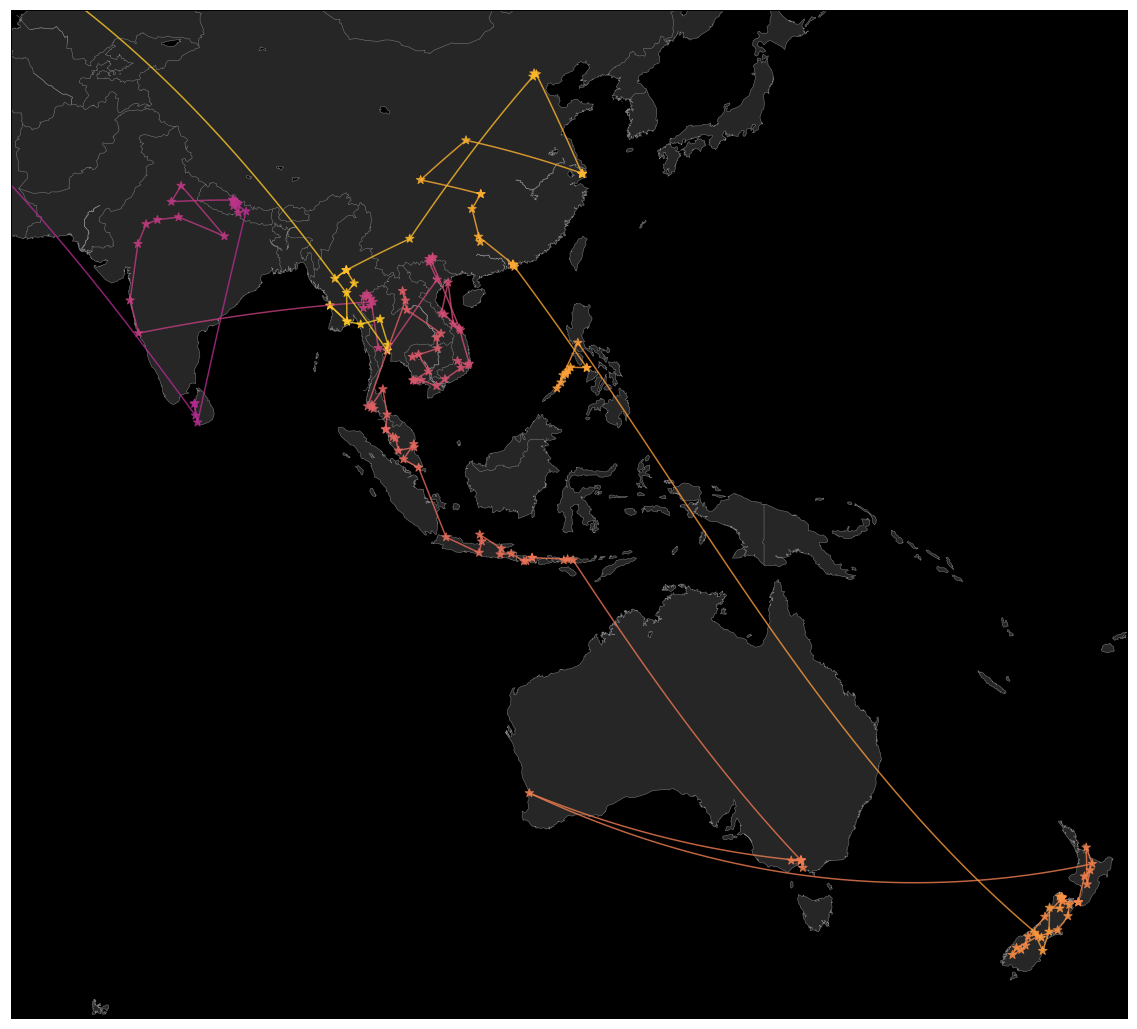

In [57]:
fig = plt.figure()

m = Basemap(projection='merc',
            llcrnrlat = -50,
            llcrnrlon = 60,
            urcrnrlat = 45,
            urcrnrlon = 180,
            resolution='l')

m.drawmapboundary(fill_color='black')
m.fillcontinents(color=[0.15,0.15,0.15],lake_color='black',zorder=1)
m.drawcoastlines(linewidth=0.5,color=[0.5,0.5,0.5])
m.drawcountries(linewidth=0.5,color=[0.5,0.5,0.5])

x,y = m(lat,long)

for i in range(len(x)-1):
    col = new_cmap(i/len(x))
    x1 = [lat[i],lat[i+1]]
    y1 = [long[i],long[i+1]]
    m.drawgreatcircle(x1[0],y1[0],x1[1],y1[1],linewidth=1.5,color=col,alpha=0.8)
    
plt.scatter(x, y, marker='*', c = range(len(x)), cmap=new_cmap,alpha=0.8,s=80,zorder=2)

fig.savefig('travel_map.pdf')



Short and sweet! I plan to print this at some stage- might have to try different background/colour combinations for it to suit printing more.